In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.23.5
1.5.3
0.12.2


A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [3]:
df=pd.read_csv('austo_automobile+(2)+(1).csv')

In [4]:
#We have 5 numerical variables and 8 categorical variables data. There is no duplicate values present in the dataset
#Ther are null values present in Gender and Partner Salary
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [6]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [7]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [8]:
#check for any duplicate values in df 
dups=df.duplicated()
print('The duplicate values =',dups.sum())


The duplicate values = 0


In [9]:
df.shape

(1581, 14)

In [10]:
print("The number of rows are",len(df.axes[0]),"\nThe number of columns are",len(df.axes[1]))

The number of rows are 1581 
The number of columns are 14


B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [11]:
# Checking the null values in variable, Gender has 53 and Partner_Salary has 106 null values.
# Missing values can be imputed
# If larger records are missing then we drop the respective columns or rows
# We describe the function to see the mean, std, min and max
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


1. The Age is between 22 to 54 are belong to wroking, median age is 29
2. The overall data of Salary given people ranging from 30000 to 99300
3. The Total_salary is ranging from 30000 to 171000
4. The minimum purchase of car is 18000, where the maximum is 70000

# Treating Anomalies

In [13]:
# Value_counts() used to check each categorical variables value counts in data. To check the issue.

In [14]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [15]:
df['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [16]:
df['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

In [17]:
df['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [18]:
df['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

In [19]:
df['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [20]:
df['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [21]:
df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [22]:
df['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

In [23]:
# As we can see in the "Gender" Columns Female spelled incorrectly so first we replace the 'Femal' and 'Femle' to 'Female'

In [24]:
df['Gender'].replace('Femal','Female',inplace=True)
df['Gender'].replace('Femle','Female',inplace=True)

In [25]:
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [26]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [27]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [28]:
# As Gender is acategorical feature so we replace null values with most frequent value which is 'Male'
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [29]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [30]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


Now we will fill the null values in Partner_salary column

As we can see Total_salary= Salary + Partner_salary

In [32]:
df[df['Partner_salary'].isnull()].index

Int64Index([  40,   43,   49,   59,  111,  115,  163,  164,  165,  205,
            ...
            1467, 1540, 1546, 1556, 1558, 1559, 1567, 1568, 1577, 1579],
           dtype='int64', length=106)

In [33]:
df['Partner_salary'].isnull().sum()

106

In [34]:
df['Partner_salary']=df['Partner_salary'].fillna(df['Total_salary']-df['Salary'])

In [35]:
df['Partner_salary'].isnull().sum()

0

In [36]:
df.Partner_salary.describe()

count     1581.000000
mean     19233.776091
std      19670.391171
min          0.000000
25%          0.000000
50%      25100.000000
75%      38100.000000
max      80500.000000
Name: Partner_salary, dtype: float64

In [37]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

So now as we can check we have successfully filled the null values with meaningful values. And now there are no any other missing or null values present in features

# Inspecting Continuous fields for anomalies/extreme values

<Axes: xlabel='Age'>

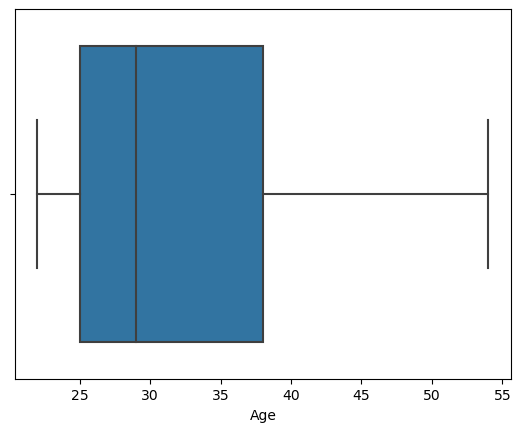

In [38]:
sns.boxplot(data=df,x='Age')


<Axes: xlabel='Partner_salary'>

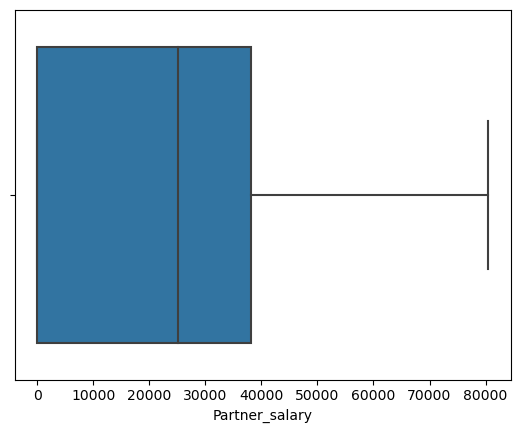

In [39]:
sns.boxplot(data=df,x='Partner_salary')

<Axes: xlabel='Salary'>

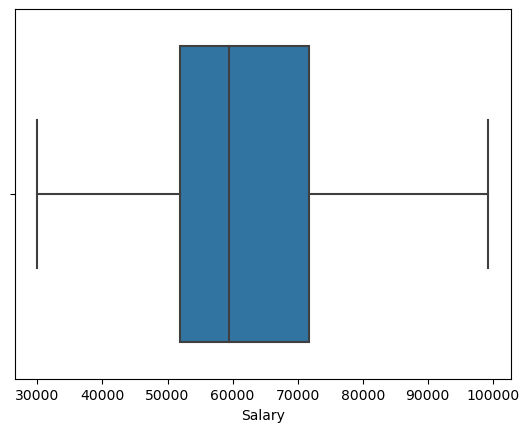

In [40]:
sns.boxplot(data=df,x='Salary')

<Axes: xlabel='Price'>

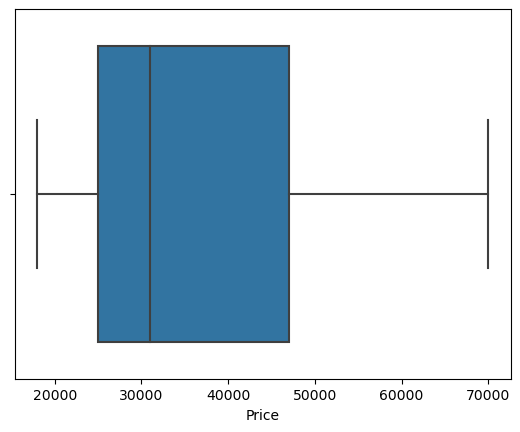

In [41]:
sns.boxplot(data=df,x='Price')

As we see from the above boxplots there is no single outlier/outliers in Age,Partner_salary,Salary and Price features

<Axes: xlabel='Total_salary'>

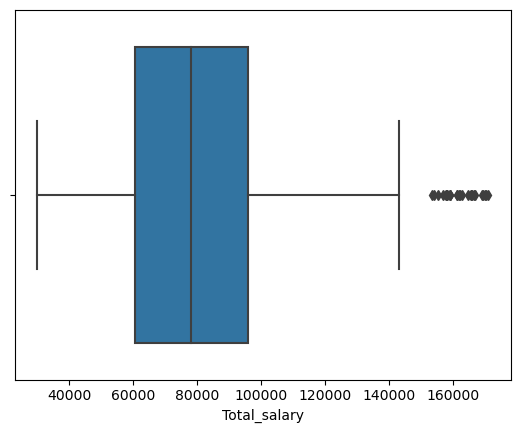

In [42]:
sns.boxplot(data=df,x='Total_salary')

The Boxplot for Total_salary contains outliers. So have to treat those outliers according to IQR equation to get more meaningful insights

In [43]:
df['Total_salary'].describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

In [44]:
df.shape

(1581, 14)

In [45]:
# we will find out the outliers by defining a user defined function
def detect_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [46]:
lr,ur=detect_outlier(df['Total_salary'])
print('Lower Range =',lr,'\nUpper Range =',ur)

Lower Range = 7400.0 
Upper Range = 149000.0


In [47]:
df['Total_salary']=np.where(df['Total_salary']>ur,ur,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lr,lr,df['Total_salary'])

<Axes: xlabel='Total_salary'>

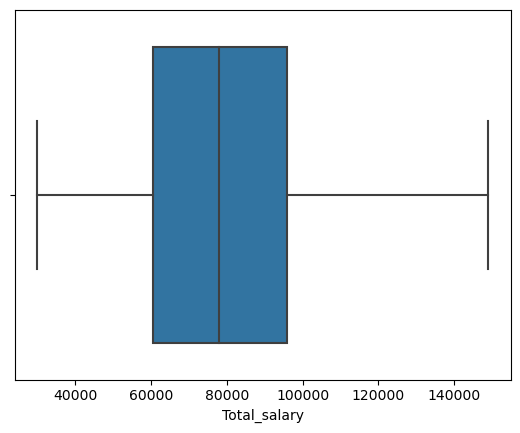

In [48]:
sns.boxplot(data=df,x='Total_salary')

In [49]:
df.Total_salary.describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

# Univariate Analysis on Numericals fields

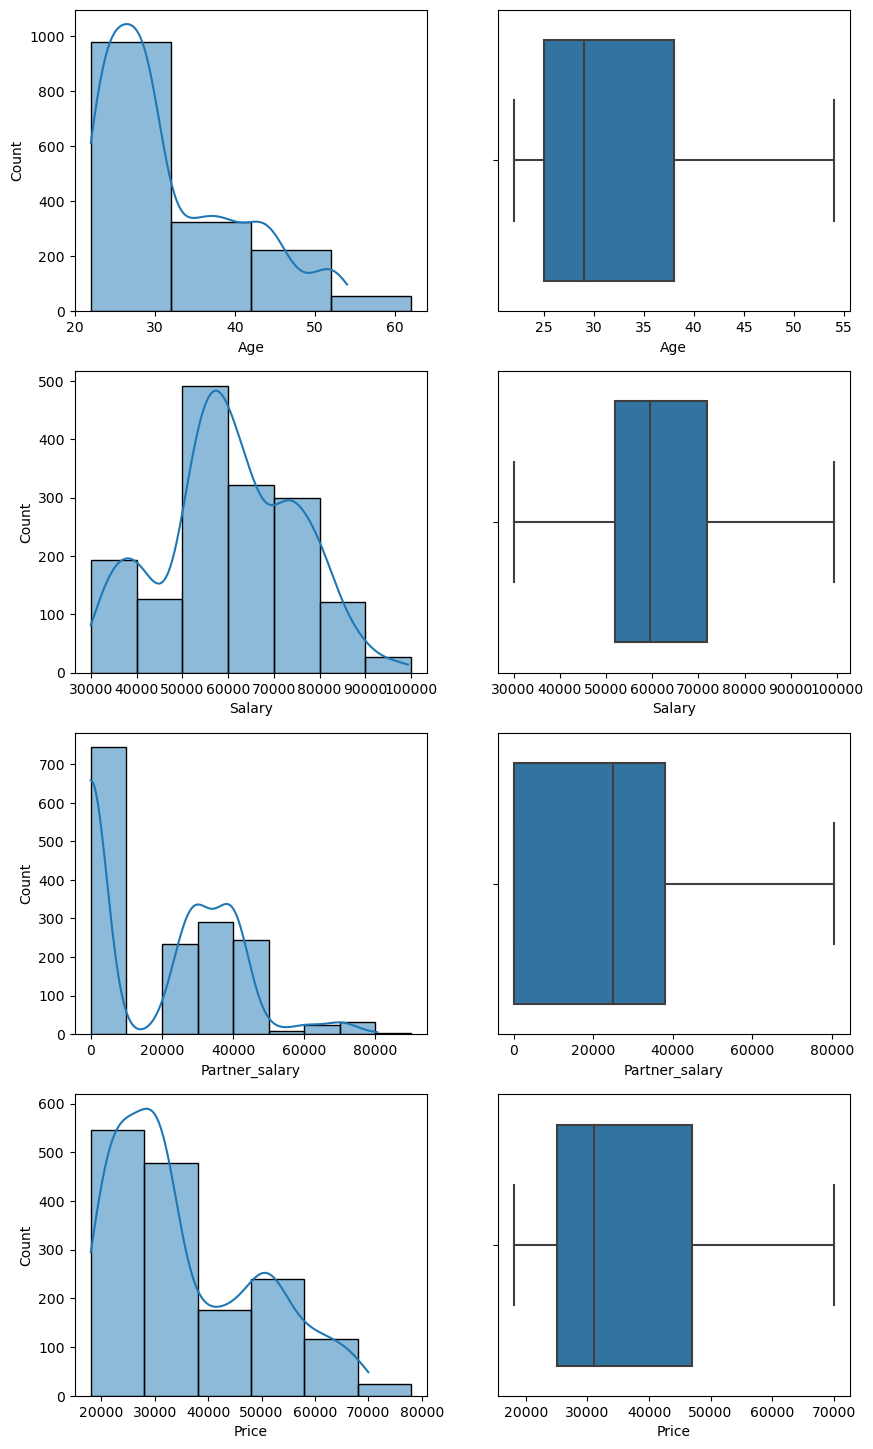

In [50]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,18))
sns.histplot(data=df,x='Age',kde=True,binwidth=10,ax=axes[0][0])
sns.boxplot(data=df,x='Age',ax=axes[0][1])
sns.histplot(data=df,x='Salary',kde=True,binwidth=10000,ax=axes[1][0])
sns.boxplot(data=df,x='Salary',ax=axes[1][1])
sns.histplot(data=df,x='Partner_salary',kde=True,binwidth=10000,ax=axes[2][0])
sns.boxplot(data=df,x='Partner_salary',ax=axes[2][1])
sns.histplot(data=df,x='Price',kde=True,binwidth=10000,ax=axes[3][0])
sns.boxplot(data=df,x='Price',ax=axes[3][1])
plt.show()

Univariate analysis on Total_salary post outlier treatment

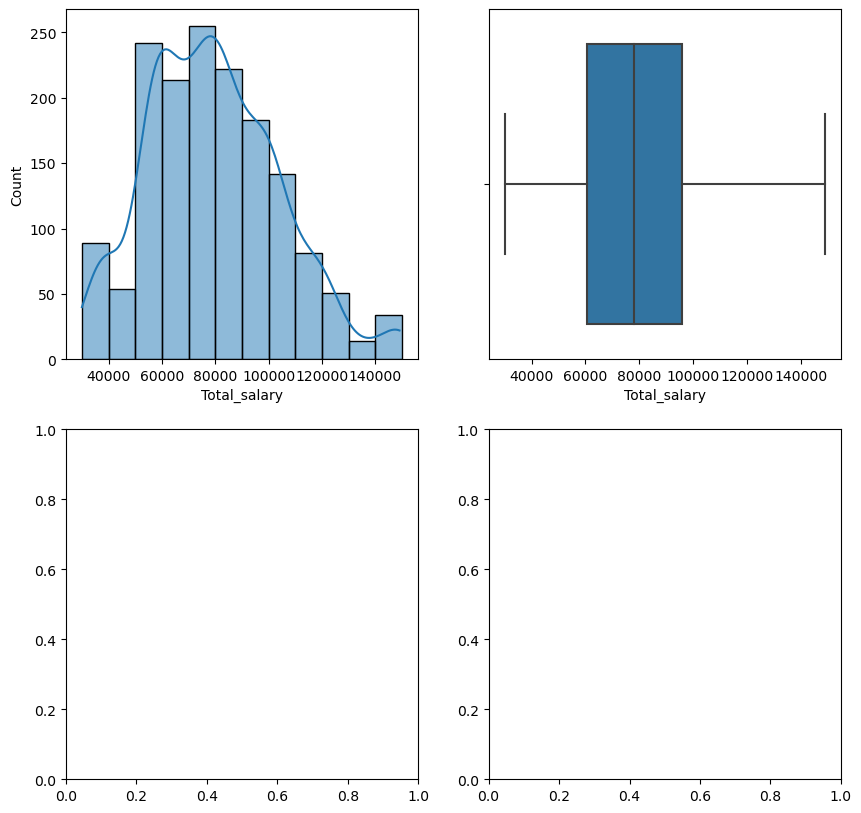

In [51]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.histplot(data=df,x='Total_salary',kde=True,binwidth=10000,ax=axes[0][0])
sns.boxplot(data=df,x='Total_salary',ax=axes[0][1])
plt.show()

Calculate skewness

# Univariate analysis on categorical variables

<Axes: xlabel='Gender', ylabel='count'>

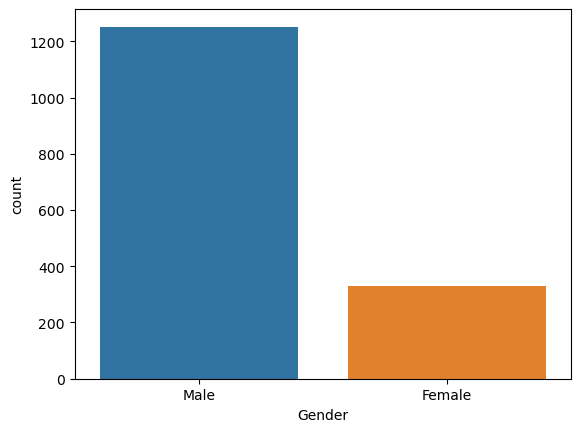

In [52]:
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Profession', ylabel='count'>

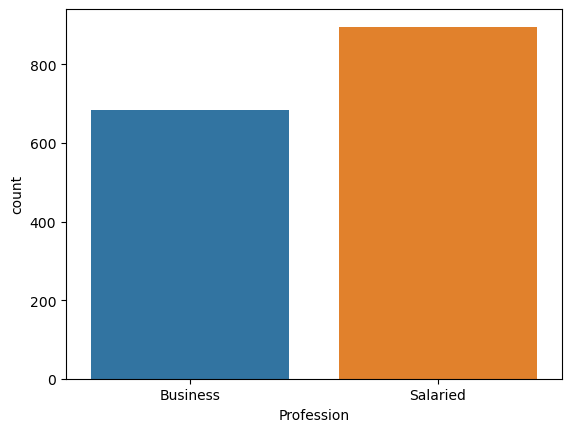

In [53]:
sns.countplot(data=df,x='Profession')

<Axes: xlabel='Marital_status', ylabel='count'>

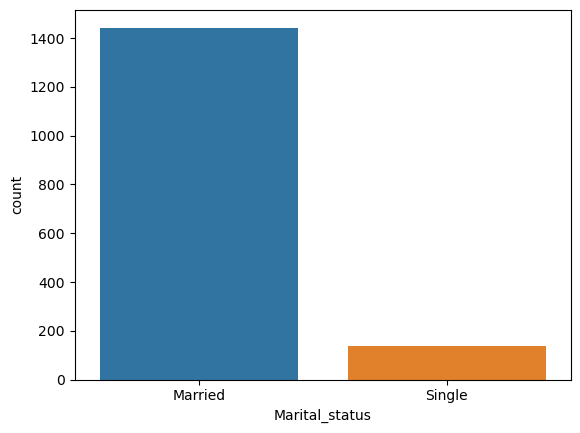

In [54]:
sns.countplot(data=df,x='Marital_status')

<Axes: xlabel='Education', ylabel='count'>

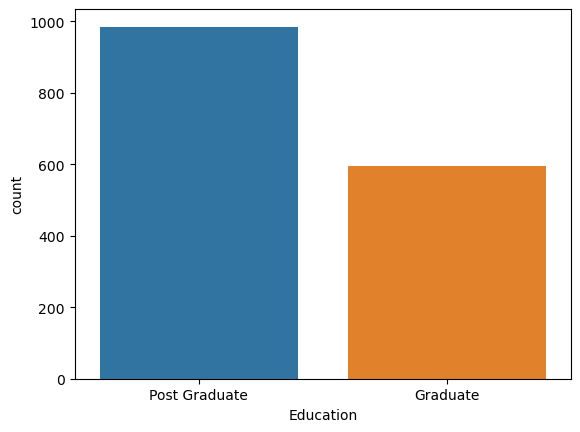

In [55]:
sns.countplot(data=df,x='Education')

<Axes: xlabel='Personal_loan', ylabel='count'>

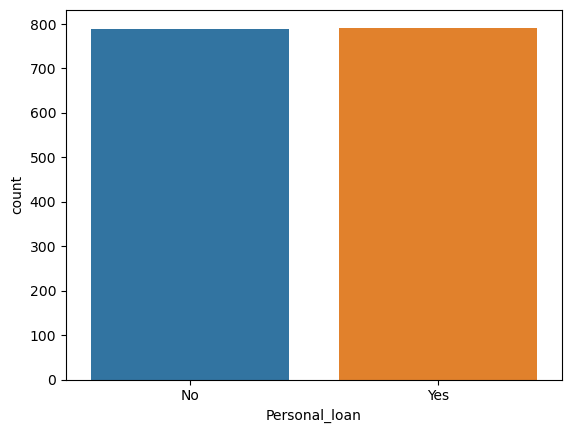

In [56]:
sns.countplot(data=df,x='Personal_loan')

<Axes: xlabel='House_loan', ylabel='count'>

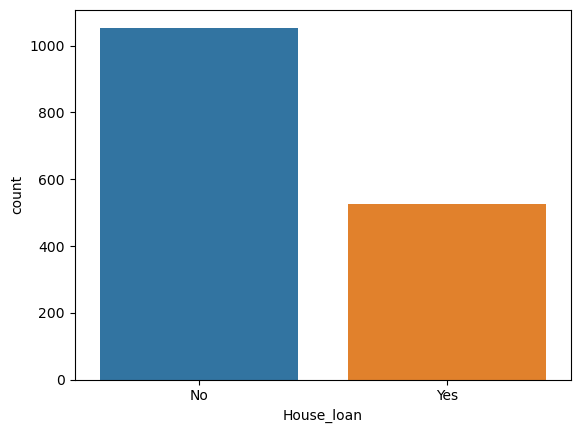

In [57]:
sns.countplot(data=df,x='House_loan')

<Axes: xlabel='No_of_Dependents', ylabel='count'>

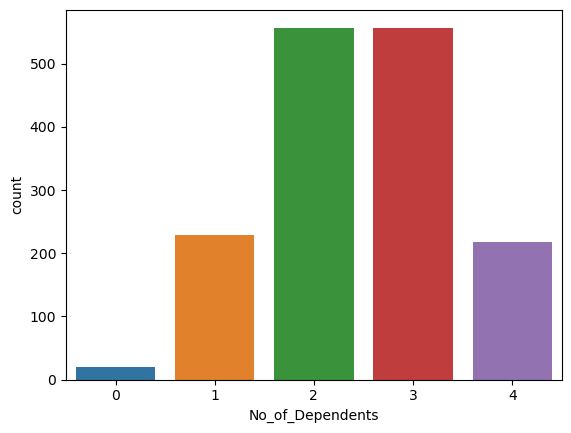

In [58]:
sns.countplot(data=df,x='No_of_Dependents')

<Axes: xlabel='Partner_working', ylabel='count'>

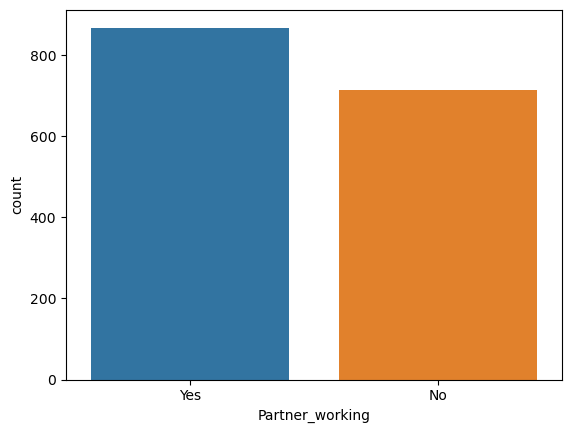

In [59]:
sns.countplot(data=df,x='Partner_working')

<Axes: xlabel='Make', ylabel='count'>

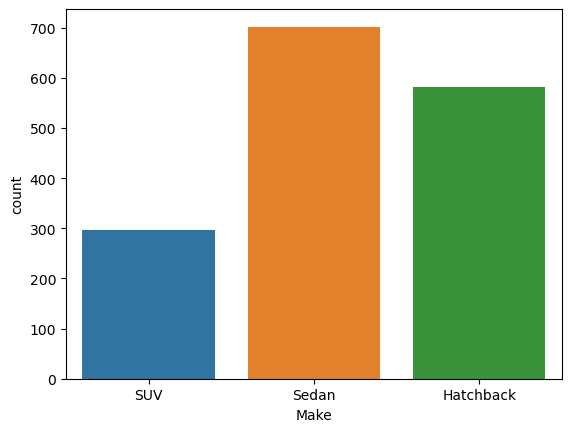

In [60]:
sns.countplot(data=df,x='Make')

D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

<Figure size 500x500 with 0 Axes>

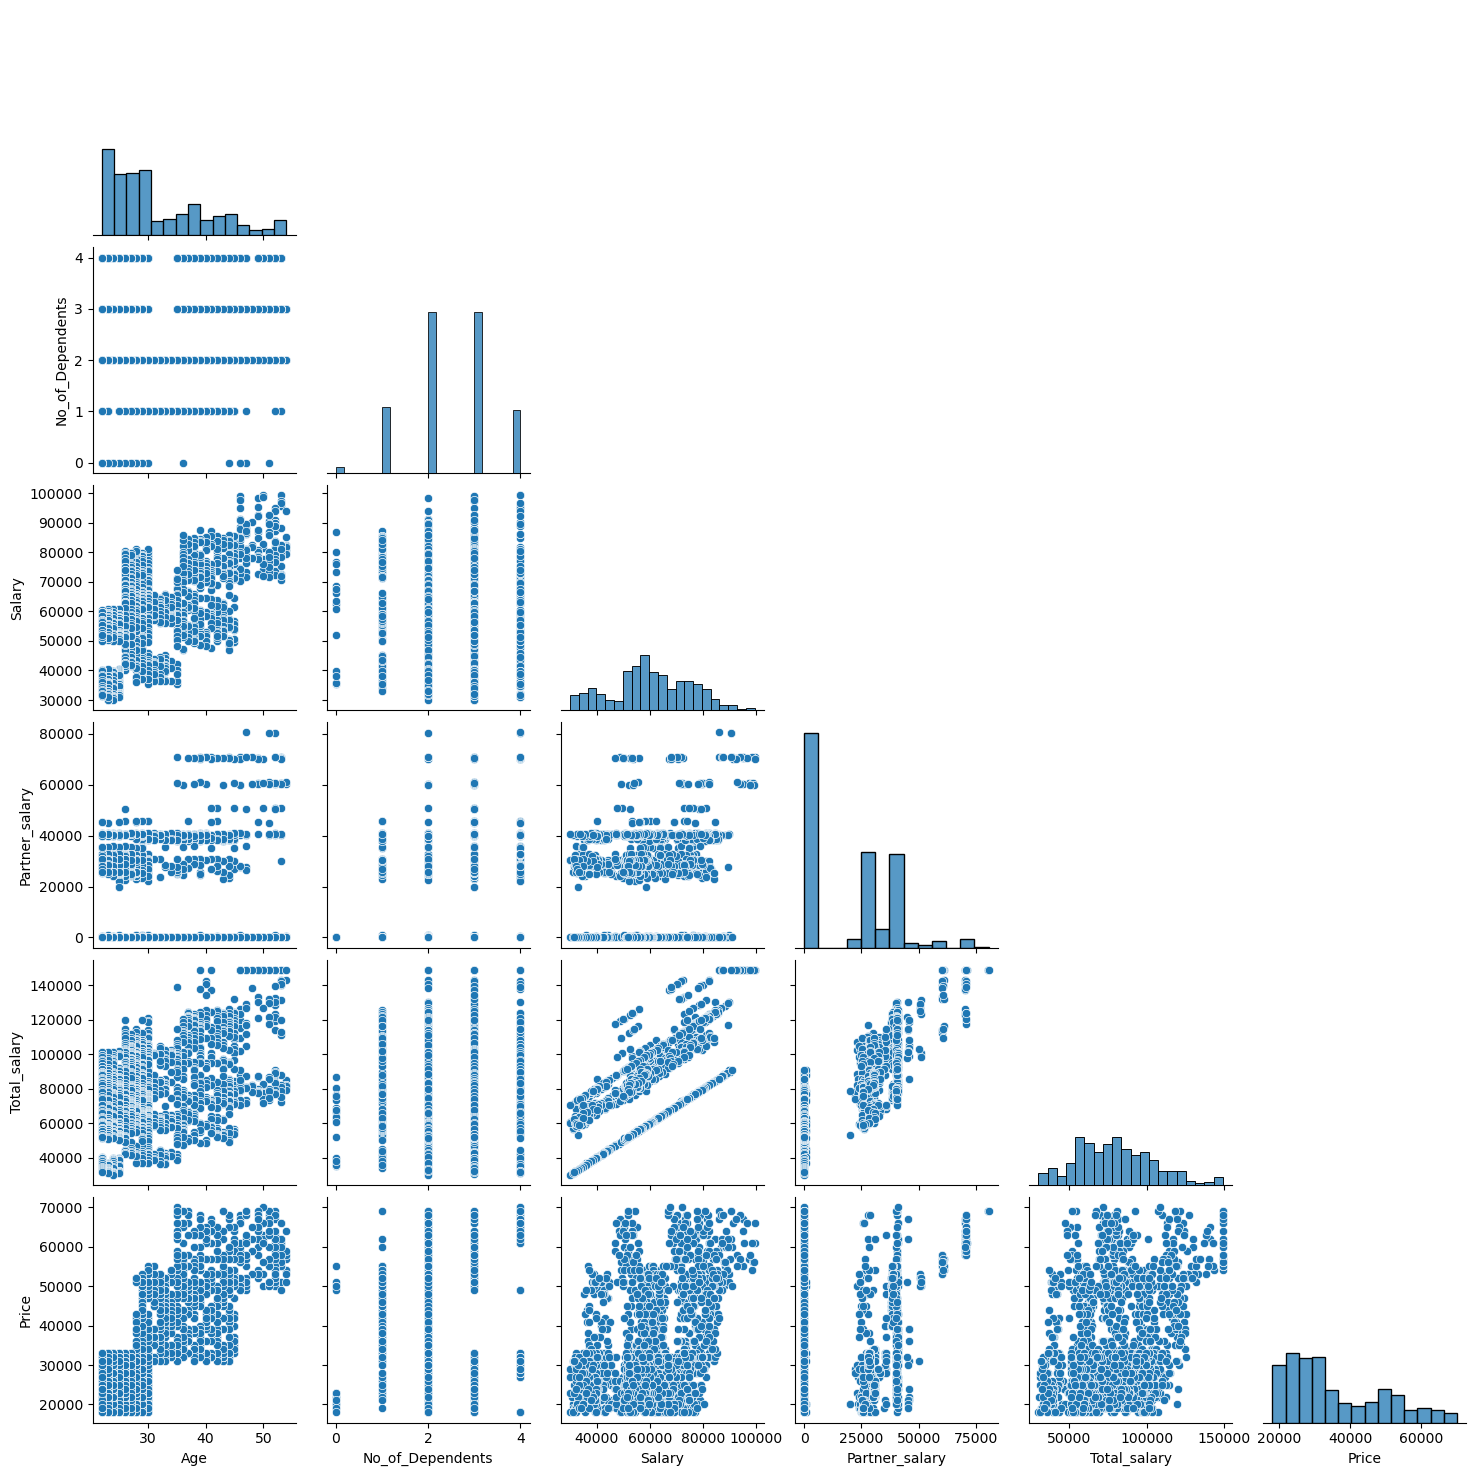

In [61]:
plt.figure(figsize=(5,5))
sns.pairplot(df,corner=True)



<Axes: >

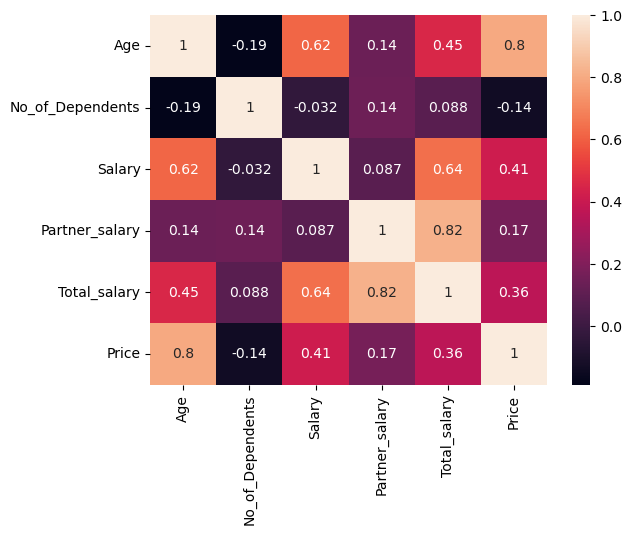

In [62]:
sns.heatmap(df.corr(),annot=True)

E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

<Axes: xlabel='Gender', ylabel='count'>

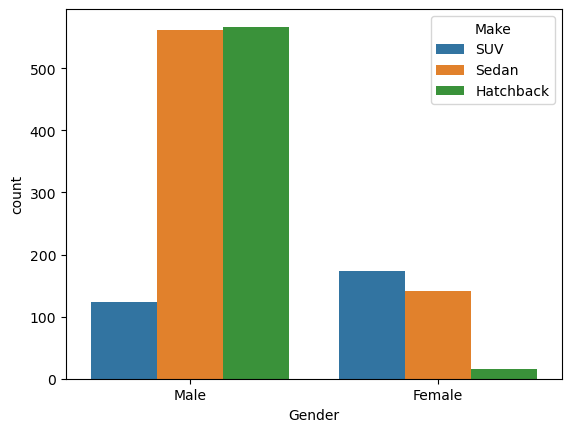

In [63]:
sns.countplot(data=df,x='Gender',hue='Make')

In [64]:
df.groupby(['Make'])['Gender'].value_counts()

Make       Gender
Hatchback  Male      567
           Female     15
SUV        Female    173
           Male      124
Sedan      Male      561
           Female    141
Name: Gender, dtype: int64

As you see above frequecy of Female who prefer SUV is larger than the frequence of Male who prefer SUV. So the statement of Roger is incorrect.

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan

In [65]:
df['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

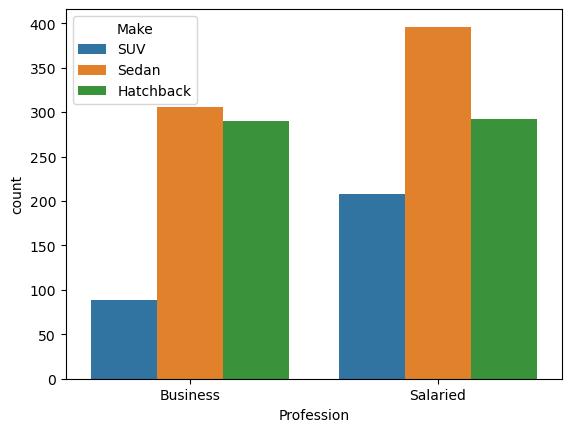

In [66]:
sns.countplot(data=df,x='Profession',hue='Make')

Statement of Ned Stark is correct

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 173.0+ KB


In [68]:
plt_data=df.groupby(['Profession','Gender'])['Make'].value_counts()
plt_data

Profession  Gender  Make     
Business    Female  SUV           55
                    Sedan         50
            Male    Hatchback    290
                    Sedan        256
                    SUV           34
Salaried    Female  SUV          118
                    Sedan         91
                    Hatchback     15
            Male    Sedan        305
                    Hatchback    277
                    SUV           90
Name: Make, dtype: int64

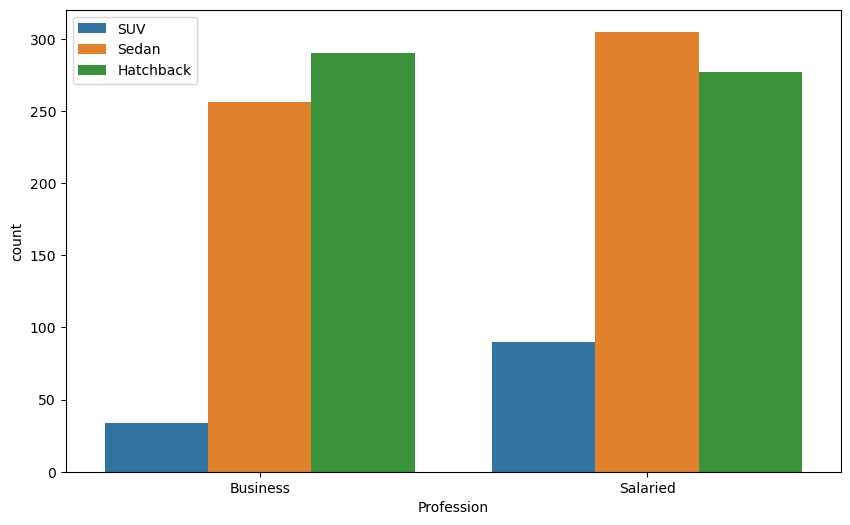

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profession',hue='Make',data=df[df['Gender']=='Male'])
plt.legend(loc='upper left')

Seldon Cooper statement is incorrect

F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

In [70]:
# Mean of Price across Gender
df.groupby(['Gender'])['Price'].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

In [71]:
df.groupby(['Gender'])['Price'].median()

Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64

F2) Personal_loan

In [72]:
df.groupby(['Personal_loan'])['Price'].mean()

Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

In [73]:
df.groupby(['Personal_loan'])['Price'].median()

Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64

G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [74]:
df.groupby(['Partner_working'])['Price'].mean()

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

In [75]:
df.groupby(['Partner_working'])['Price'].median()

Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64

H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [76]:
df.groupby(['Gender','Marital_status'])['Make'].value_counts()

Gender  Marital_status  Make     
Female  Married         SUV          166
                        Sedan        127
                        Hatchback     14
        Single          Sedan         14
                        SUV            7
                        Hatchback      1
Male    Married         Sedan        537
                        Hatchback    484
                        SUV          115
        Single          Hatchback     83
                        Sedan         24
                        SUV            9
Name: Make, dtype: int64

In [77]:
df2=pd.read_excel('godigt_cc_data (1).xlsx')

In [78]:
df2.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [80]:
df2.shape

(8448, 28)

In [81]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


In [82]:
df2.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [83]:
df2['Transactor_revolver'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8448 entries, 0 to 8447
Series name: Transactor_revolver
Non-Null Count  Dtype 
--------------  ----- 
8410 non-null   object
dtypes: object(1)
memory usage: 66.1+ KB
